## This notebook is divided in two parts. In the first cell, a sum-up is made. You just have to follow the instructions launched by the first cell (Import Homework)

## To launch the work about a precise/ all resturants, just click on "Kernel", "Restart and run all" and follow the instructions of the first cell.

## NB: If you want to launch the study about all restaurants, just enter 0

{0: 'All', 1: ' La Plata Steakhouse ', 2: ' Bombaylicious ', 3: ' Bella Italia - Uxbridge ', 4: ' Spice Station ', 5: ' Oliveira Organic Vegetarian Kitchen ', 6: ' Tony Parkin at The Tudor Room ', 7: ' Doosra ', 8: ' 4 Locos Argentine Steakhouse ', 9: " Melucci's ", 10: ' Mezzet Dar ', 11: ' Obon Sushi & Udon ', 12: ' Awesome Thai #Barnes ', 13: ' Haweli of Ealing ', 14: ' Revolution ', 15: ' Lentil ', 16: ' Ponte Nuovo ', 17: ' Mezzet Lebanese Restaurant ', 18: ' ITJL ', 19: ' Wild Thyme ', 20: ' Umi ', 21: ' The French Table ', 22: ' Sidra ', 23: ' Taste Of Peshawar ', 24: ' The Lounge Cafe ', 25: ' Orpington Citi Kitchen ', 26: ' Rendez Vous Caffe ', 27: ' Ottimmo Bao Bao ', 28: ' La Dolce Vita ', 29: ' Piate ', 30: ' the Orpington '}


Enter the number of the restaurant in the dictionnary you want to inspect27


You have chosen the restaurant:   Ottimmo Bao Bao 


Here are the reviews for the restaurant:   Ottimmo Bao Bao 


10163    What amazing food, glorious food, it's a small..

,absolute,absolutely,abundance,accommodating,accompany,actually,additional,adventurous,advisor,affordable,afternoon,ago,agree,alternative,amazing,amazingly,apart,apple,area,ask,atmosphere,attentive,authentic,available,average,avoid,away,balanced,bar,beaten,beautiful,beautifully,beauty,best,better,big,birthday,bit,bite,blown,boring,bowl,box,bread,break,bright,brilliant,bun,business,busy,buy,buzzing,came,care,carrot,cash,certainly,chain,chance,change,charge,cheap,check,checked,chicken,childhood,chip,choice,clean,close,closer,coffee,come,comfortable,coming,commitment,complain,confused,confusion,consistent,consistently,convenient,conversation,cooking,costa,costumer,cosy,couple,covid,cozy,crab,cream,create,crispy,crockery,cuisine,curious,currently,custard,cute,dad,date,daughter,day,deal,decide,decorated,defiantly,definitely,delicate,delicately,delicious,delight,delivery,die,different,difficult,dim,dining,dinner,disappoint,disappointed,discovered,dish,divine,door,double,dream,duck,dug,easily,east,eat,eaten,eating,efficient,efficiently,enjoy,enjoyable,entertaining,enticing,entrance,environment,especially,excellent,excited,experience,extra,extremely,failure,faith,falsely,family,fancy,fantastic,fantastically,far,fare,fast,faster,faultless,feather,feeling,felt,filled,filling,finally,finding,finish,finished,firm,flavor,flavour,flower,fluffy,foo,food,footfall,form,fortune,fresh,freshly,fried,friend,friendly,fusion,future,ga,gave,gem,getting,glad,glass,glorious,going,gone,good,got,greasy,great,green,grown,guarantee,half,happily,happy,healthy,helpful,hidden,high,highly,historical,home,honestly,hope,horrible,hot,house,hug,huge,hungry,husband,ice,idea,ideal,ill,importantly,incredible,inexpensive,initially,inside,interesting,interior,jap,job,join,juice,kale,kebab,kind,knew,lady,late,later,law,le,leap,leave,leaving,left,light,like,lily,limited,lite,little,live,lived,loaded,local,location,long,look,looking,lot,loud,love,lovely,loving,luckily,lunch,main,make,man,manager,maybe,meal,meaning,meat,menu,midweek,mile,minute,miss,mix,mock,modern,money,mother,mushroom,music,near,needle,negative,new,nice,nicely,niggle,non,normal,notch,note,number,obvious,obviously,occasion,offer,old,open,option,order,ordered,oriental,outside,outstanding,overly,owner,pack,pain,par,partner,party,passing,past,pay,peaceful,pearl,penny,people,perfect,perfectly,peri,person,pic,pick,picked,pickle,ping,piping,place,plain,plus,point,polite,politely,pong,pop,pork,port,portion,post,potato,prepared,pretty,price,priced,probably,properly,punch,quality,quick,quickly,quiet,quirky,quite,rainbow,range,rarely,rated,read,reading,real,really,reasonable,recently,recommend,refreshing,refreshingly,regret,regularly,remember,reminder,report,resist,restaurant,return,review,revisit,right,roll,room,round,salad,sample,saturated,saw,say,saying,scrumptious,seaweed,second,section,selection,serve,service,set,shell,shopping,similar,simple,simpler,sitting,size,sized,slop,small,smaller,smile,snack,soft,sold,solid,soon,sooner,sort,sought,soul,soup,space,sparkly,special,specially,spend,spending,spent,spot,spread,spring,sprung,squid,staff,standard,station,stay,stir,stop,stopped,stopping,straight,street,strongly,stunning,style,success,suggest,sum,super,superb,support,sure,sweet,ta,table,tapa,tart,taste,tasted,tasting,tasty,tea,teapot,thanks,thats,thing,think,thong,thoroughly,thought,tick,time,timely,tiny,toast,today,token_number,took,town,track,travelled,treat,tried,trip,truly,try,tuck,tummy,turn,twice,type,unbelievably,understand,understood,unfortunately,unique,unobtrusive,unusual,used,usual,usually,value,variety,various,venue,visit,visiting,wacky,wait,walk,want,warm,washed,way,week,welcome,welcoming,went,wholesome,wife,window,wish,witty,wonderful,wonky,wooden,work,working,world,worried,worth,wow,wrong,year,yesterday,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,



Here are the graphs summarizing the study about the restaurant:   Ottimmo Bao Bao 




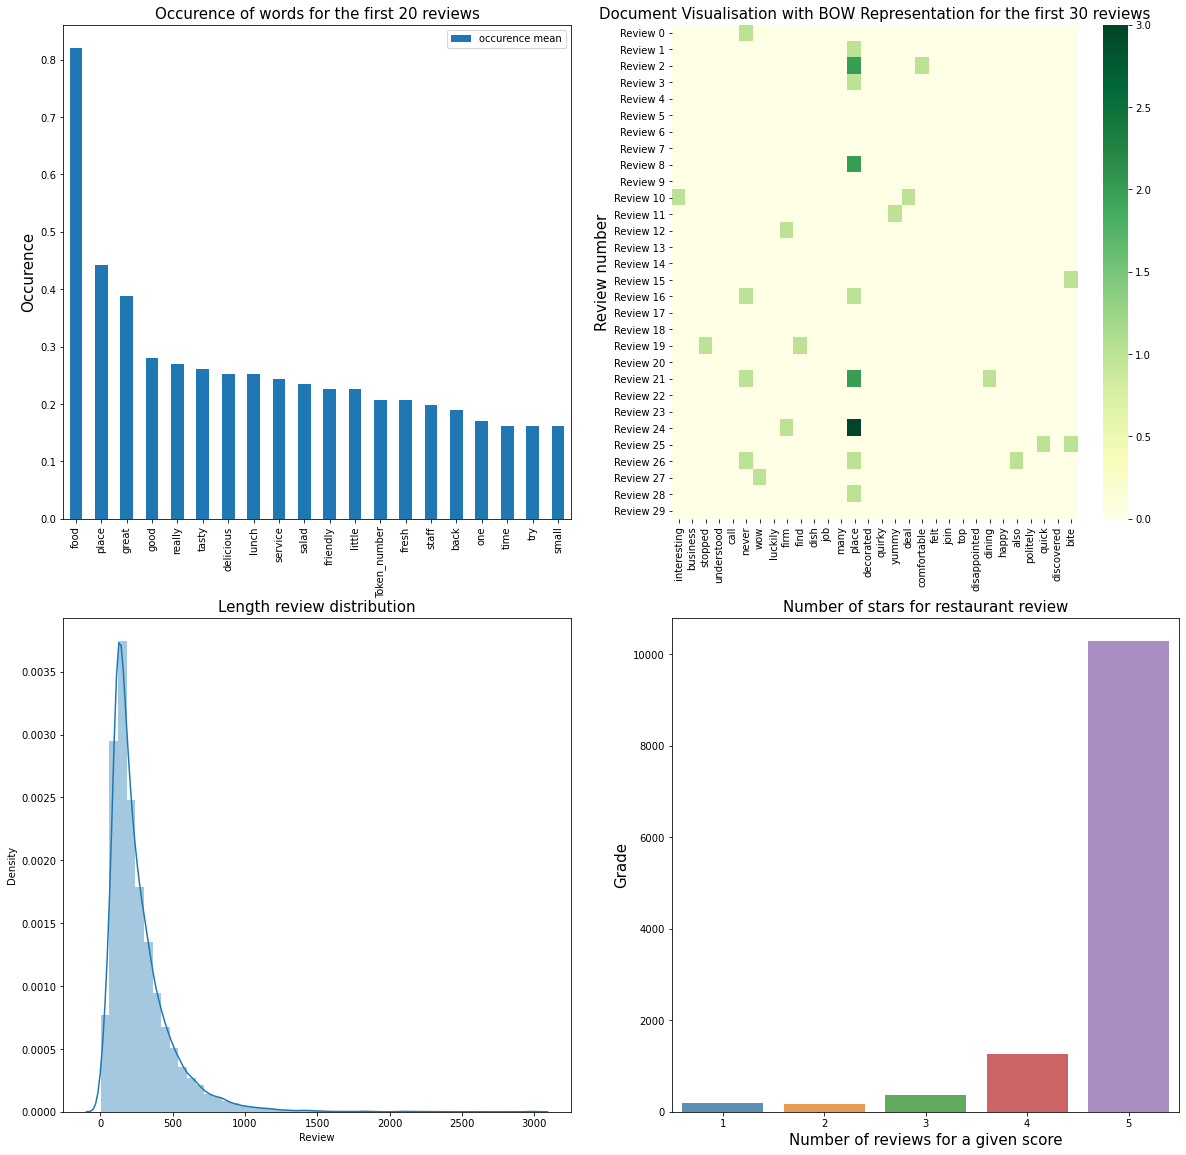

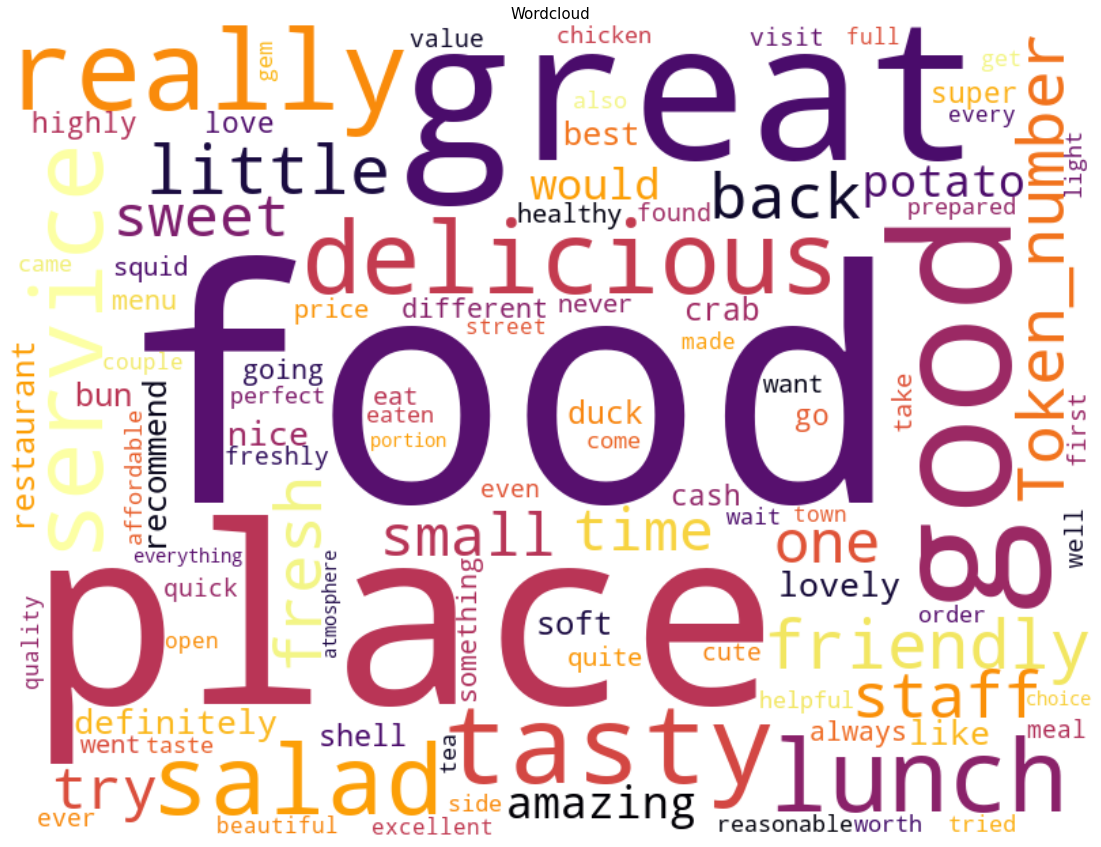

None


In [1]:
import Homework

In [4]:
import pandas as pd 
import numpy as np 
from string import punctuation
import seaborn 
from nltk import word_tokenize
from nltk import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('words', quiet=True);


# Load Data

In [6]:
# Let's use our dataset
df = pd.read_json("SauvegardeFinaleGrade4.json")
df.head()

,Restaurant,Adresse,Rank,Date,Tittle,Review,Grade,Username,Price,Style
0,La Plata Steakhouse,East Sheen 109 Sheen Lane,#4,2020-06-10,“The best steak in London”\n,For the last 9 years I’ve been working in East...,5,Sasa0870,€17 - €62,[]
1,La Plata Steakhouse,East Sheen 109 Sheen Lane,#4,2020-06-14,“Steak!!!!!!”\n,So I been wanting to try this place for a whil...,5,Alizenwall,€17 - €62,[]
2,La Plata Steakhouse,East Sheen 109 Sheen Lane,#4,2020-07-01,“Steak delivered to my door”\n,"My sis suprise me with a birthday gift, 2 juic...",5,cielodeloscielosh,€17 - €62,[]
3,La Plata Steakhouse,East Sheen 109 Sheen Lane,#4,2020-02-27,“These guys couldn’t do more if they tried ”\n,These guys couldn’t do more if they tried. Sun...,5,BenjaminMill,€17 - €62,[]
4,Bombaylicious,145 Brighton Road,#1,2020-11-14,“Absolutely stunning food!”\n,I'm not one to leave many reviews for a takeaw...,5,IamtheDC,€6 - €28,[]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  12294 non-null  object        
 1   Adresse     12294 non-null  object        
 2   Rank        12294 non-null  object        
 3   Date        12294 non-null  datetime64[ns]
 4   Tittle      12294 non-null  object        
 5   Review      12294 non-null  object        
 6   Grade       12294 non-null  int64         
 7   Username    12294 non-null  object        
 8   Price       12294 non-null  object        
 9   Style       12294 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 960.6+ KB


In [8]:
# A small function to get a much proper dataset
def transform_df(df):
  df_copy = df.copy()
  #Transforming the title
  df_copy["Tittle"] = df_copy["Tittle"].str.replace('\n', '').astype(str)
  #Transforming the rank to an int
  df_copy["Rank"] = df_copy["Rank"].str.replace('#', '').astype(str).astype(int)
  #Transforming the rank to an int
  df_copy["Style"] = df_copy["Style"].astype(str)
  
  #Transforming the grade to an int
  df_copy["Grade"] = df_copy["Grade"].astype(str).astype(int)
  #Transforming the price into two variables
  df_copy["Price"] = df_copy["Price"].str.replace('€', '')
  df_copy['Low Price €'] = df_copy["Price"].str.split(expand=True)[0]
  df_copy['High Price €'] = df_copy["Price"].str.split(expand=True)[2]
  df_copy = df_copy.drop('Price', axis=1)
  return(df_copy)

df = transform_df(df)
df.head()

,Restaurant,Adresse,Rank,Date,Tittle,Review,Grade,Username,Style,Low Price €,High Price €
0,La Plata Steakhouse,East Sheen 109 Sheen Lane,4,2020-06-10,“The best steak in London”,For the last 9 years I’ve been working in East...,5,Sasa0870,[],17,62
1,La Plata Steakhouse,East Sheen 109 Sheen Lane,4,2020-06-14,“Steak!!!!!!”,So I been wanting to try this place for a whil...,5,Alizenwall,[],17,62
2,La Plata Steakhouse,East Sheen 109 Sheen Lane,4,2020-07-01,“Steak delivered to my door”,"My sis suprise me with a birthday gift, 2 juic...",5,cielodeloscielosh,[],17,62
3,La Plata Steakhouse,East Sheen 109 Sheen Lane,4,2020-02-27,“These guys couldn’t do more if they tried ”,These guys couldn’t do more if they tried. Sun...,5,BenjaminMill,[],17,62
4,Bombaylicious,145 Brighton Road,1,2020-11-14,“Absolutely stunning food!”,I'm not one to leave many reviews for a takeaw...,5,IamtheDC,[],6,28


## Explore Data

Average rating is : 4.73


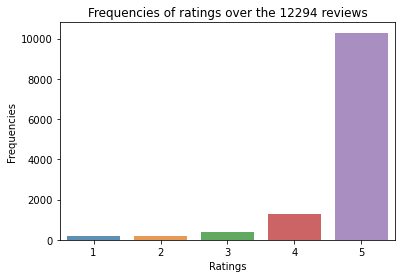

In [9]:
print('Average rating is : {}'.format(round(df.Grade.mean(),2)))

# Plotting rating distribution
X_ratings = df.Grade.value_counts()
ax = sns.barplot(X_ratings.index,X_ratings,alpha=0.8)
ax.set(xlabel='Ratings',ylabel='Frequencies',title='Frequencies of ratings over the {} reviews'.format(df.shape[0]))
plt.show()

In [10]:
#Let's have a look to the style of the restaurant
print(df['Style'].value_counts())

[]                    8783
['Italian']           1983
['Thai']               620
['British']            467
['Indian']             304
['Middle Eastern']     137
Name: Style, dtype: int64


<AxesSubplot:xlabel='Style', ylabel='Grade'>

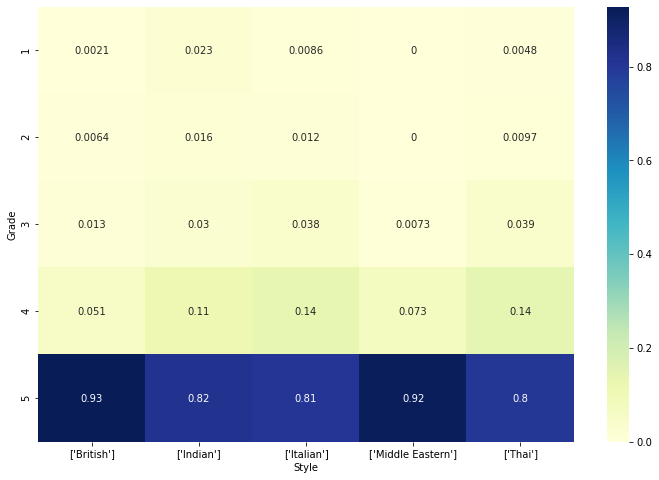

In [11]:
#Let's try to have something more cleat to vizualise
df_style = df[df['Style'] != '[]']
df_style.head()

crosstab = pd.crosstab(df_style['Grade'], df_style['Style'], normalize='columns')
plt.figure(figsize=(12,8)) 
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")

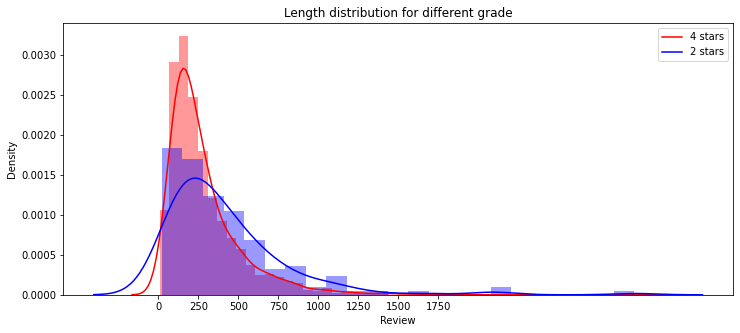

In [12]:
# Plot density with histogram
plt.figure(figsize=(12,5))
sns.distplot(df[df["Grade"] == 4]['Review'].apply(len), color="r")
sns.distplot(df[df["Grade"] == 2]['Review'].apply(len), color="b")
plt.title('Length distribution for different grade')
plt.legend(labels=['4 stars','2 stars'])
plt.xticks(range(0,2000,250))
plt.show()

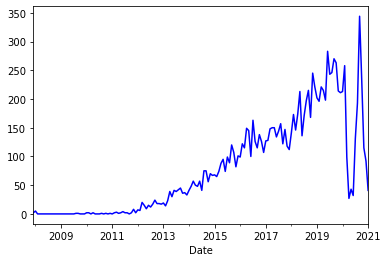

In [13]:
# Visualize dates 
df.set_index('Date')['Review'].resample('M').count().plot(color="b")
plt.show()

## Define a Class

In [14]:
class all_func(): 

  ##############################################################################
  def cleaning_lemmatize(corpus, number = True):
    #Switiching to lower character the corpus
    corpus1 = [review.lower() for review in corpus]  

    #Remove special character
    characters_to_remove = ["@", "/", "#", ".", ",", "!", "?", ";", "(", ")", "-", "_","’","'", "\"", ":", "&", "\n"]
    transformation_dict = {initial:" " for initial in characters_to_remove}
    corpus2 = [review.translate(str.maketrans(transformation_dict)) for review in corpus1]

    #Tokenized the text
    tokenized_corpus = [nltk.word_tokenize(review) for review in corpus2]

    #Delete foreign world
    words = set(nltk.corpus.words.words())
    english_corpus = [[w for w in tokenized_corpus[i] if w in words or not w.isalpha()]
                      for i in range(len(tokenized_corpus))]

    #Stoping world
    stop_words = nltk.corpus.stopwords.words("english")
    new_corpus = [[token for token in english_corpus[i] if token not in stop_words] 
                    for i in range(len(english_corpus))]

    #Lematizing
    lmtzr = WordNetLemmatizer()
    lematized = [[lmtzr.lemmatize(word) for word in new_corpus[i]] 
                for i in range(len(new_corpus))]

    #Remove number
    if number == True :

      number_corpus = [[w if not any(j.isdigit() for j in w)  else 'Token_number' for w in lematized[i]]
                      for i in range(len(lematized)) ]
      #alternatice : w.isdigit() instead of any(j.isdigit() for j in w)
      return number_corpus

    else :
      return lematized
  ##############################################################################


  ##############################################################################
  def get_tfidf_Matrix(corpus):
    corpus_clean = [' '.join(sentence) for sentence in corpus]
    vectorizer = TfidfVectorizer(stop_words='english')
    vect_corpus = vectorizer.fit_transform(corpus_clean)
    feature_names = np.array(vectorizer.get_feature_names())

    df_tfidf = pd.DataFrame(vect_corpus.todense(), columns = feature_names)
    return df_tfidf
  ##############################################################################


  ##############################################################################
  def affichage_corpus(corpus):
    df = all_func.get_tfidf_Matrix(corpus)
    df_mean = df.mean().sort_values(ascending=False).to_frame(name='tfidf mean')

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
    ax[-1, -1].axis('off')

    #Worldcloud
    dict_words_tfidf = df_mean[df_mean['tfidf mean'] != 0].to_dict()['tfidf mean']
    wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100)
    wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf)
    
    ax[0, 0].imshow(wordcloud, interpolation="bilinear")
    ax[0, 0].set_title("Wordcloud")
    ax[0, 0].axis("off")

    #Heat map
    g2 = sns.heatmap(df.iloc[:30, :30], cmap='YlGn', ax=ax[1, 0])
    g2.set_ylabel("Review number")
    g2.set_xlabel("Word")
    g2.set_title("Document Visualisation with BOW Representation for the first 30 reviews")

    #Barplot
    g1 = df_mean[:15].plot(kind='bar', ax=ax[0, 1])
    g1.set_title('Bar plot of most commun world')
    
  ##############################################################################

  ##############################################################################
  def restaurants_corpus(df, stars='All', Restaurant_name='All', number = True):
    df = df.copy()

    #Select restaurant
    if str(Restaurant_name)=='All' : 
      df = df
    elif str(Restaurant_name) not in df["Restaurant"].unique():
      print("The restautant you entered is not in the list")
    else :
      df = df[df["Restaurant"] == str(Restaurant_name)]
    
    #Select stars 
    if str(stars)=='All' : 
      df = df
    else : 
      df = df[df["Grade"] == int(stars)]
    
    #Extract and clean corpus
    return all_func.cleaning_lemmatize(df['Review'].tolist(), number)
  ##############################################################################  

  ##############################################################################
  def restaurants_review_analysis(df, stars='All', Restaurant_name='All', number = True):
    df = df.copy()
    
    #Extract and clean corpus
    df_clean = all_func.restaurants_corpus(df, stars,  Restaurant_name, number)

    #Affichage
    all_func.affichage_corpus(df_clean)
  ##############################################################################

  ##############################################################################
  def restaurants_grade_analysis(df, stars='All', Restaurant_name='All'):
    df = df.copy()

    #Select restaurant
    if str(Restaurant_name)=='All' : 
      df = df
    elif str(Restaurant_name) not in df["Restaurant"].unique():
      print("The restautant you entered is not in the list")
    else :
      df = df[df["Restaurant"] == str(Restaurant_name)]
    
    #Select stars 
    if str(stars)=='All' : 
      df = df
    else : 
      df = df[df["Grade"] == int(stars)]

    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
    ax[-1, -1].axis('off')

    #Length of comment
    g1 = sns.distplot(df['Review'].apply(len), ax=ax[0, 0])
    g1.set_title("Length review distribution")
    plt.xticks(range(0,2000,250))

    #Commetn threw time
    g2 = df.set_index('Date')['Review'].resample('M').count().plot(color="b", ax=ax[0, 1])
    g2.set_title("Number of comment threw time")
    g2.set_title('Length review distribution over {} reviews'.format(df.shape[0]))
    g2.set_ylabel("Review number")
    g2.set_xlabel("Time")

    #Repartition of review
    if str(stars)=='All' : 
      X_ratings = df["Grade"].value_counts()
      g3 = sns.barplot(X_ratings.index,X_ratings,alpha=0.8, ax=ax[1, 0])
      g3.set_title('Frequencies of ratings over the {} reviews'.format(df.shape[0]))
      g3.set_xlabel("Number of reviews for a given score")
      g3.set_ylabel("Grade")  

    else :
      ax[1, 0].axis('off')
      
  ##############################################################################





We choosed not to give any particular shape  to our worldcloud in order to keep it as clear as possible

## Use the class

In [15]:
# Clean a the review in a corpus
corpus = all_func.cleaning_lemmatize(df['Review'].tolist(), number = True)
corpus[0][:10]

['last',
 'Token_number',
 'working',
 'east',
 'sheen',
 'passing',
 'la',
 'day',
 'finally',
 'decided']

In [29]:
# From the corpus get the tfidf matrix
tfidf = all_func.get_tfidf_Matrix(corpus)
tfidf.head()

,aa,aback,abate,abbey,ability,able,abolish,abroad,abrupt,abruptly,...,zak,zero,zest,zing,zoom,zucchini,धन,यव,ᒪey,ᗷe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


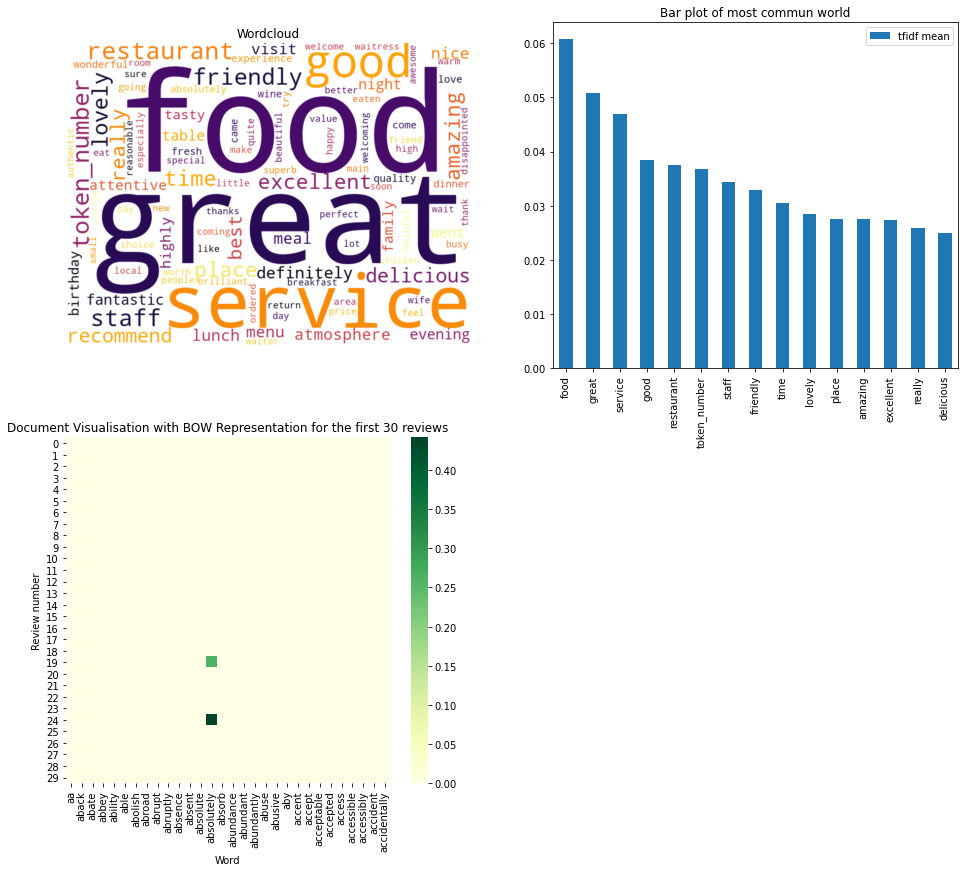

In [30]:
# Get a vizualisation for all restaurant
all_func.affichage_corpus(corpus)

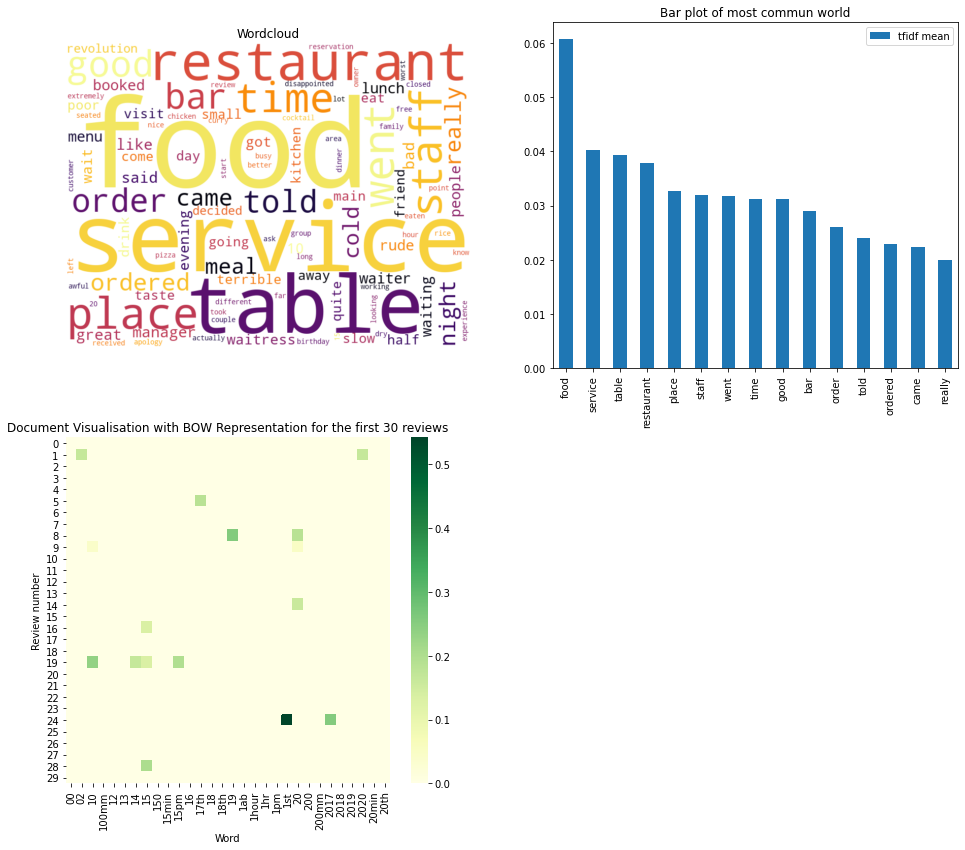

In [31]:
#Let's now only visualize the worst revies
all_func.restaurants_review_analysis(df, stars=1, number=False)

## Restaurant analysis

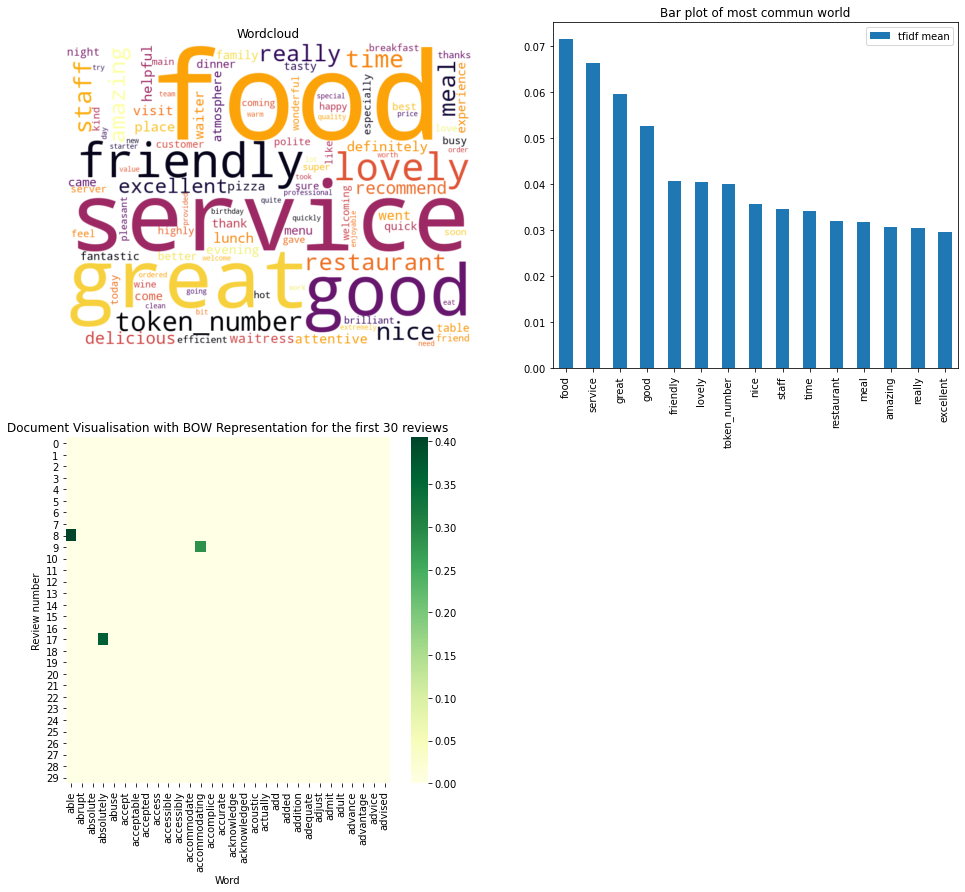

In [32]:
#Let's focus on a single restaurant
restaurant_name = ' Bella Italia - Uxbridge '
all_func.restaurants_review_analysis(df, stars='All', Restaurant_name = restaurant_name, number = True)

We can see that for this precise restaurant the service and the food are often put foward.

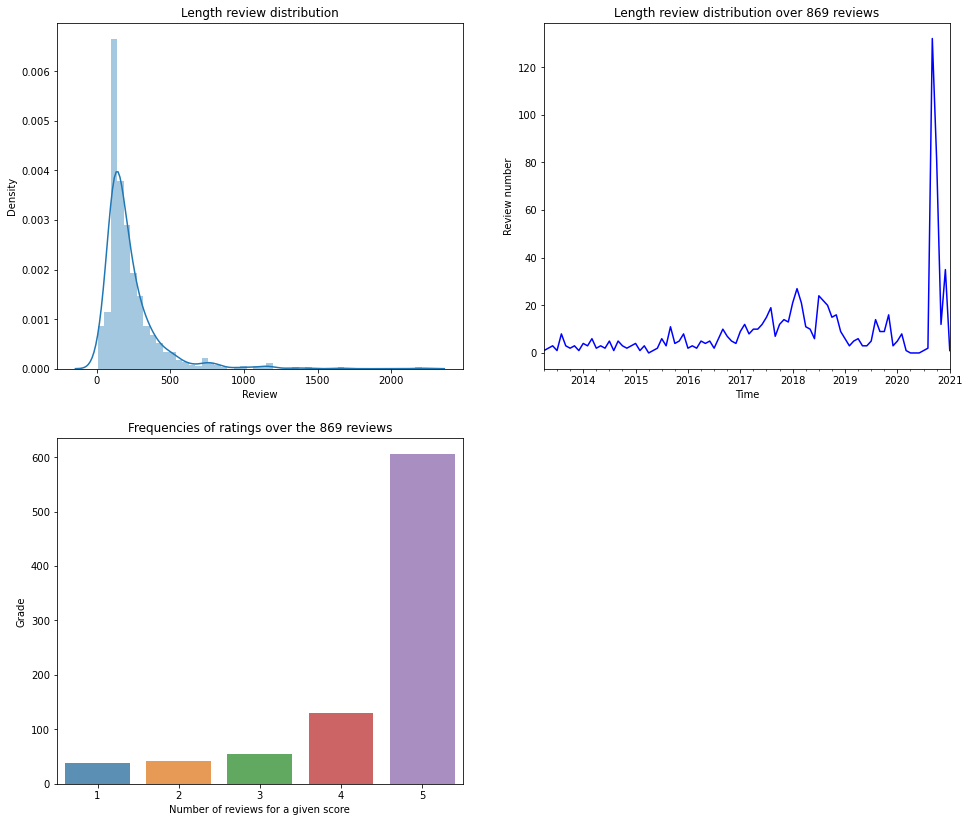

In [33]:
# Let's have a global look to some information about the reviews
all_func.restaurants_grade_analysis(df, Restaurant_name = restaurant_name, stars='All');

We can see that the number of review explode during the last month of 2020.

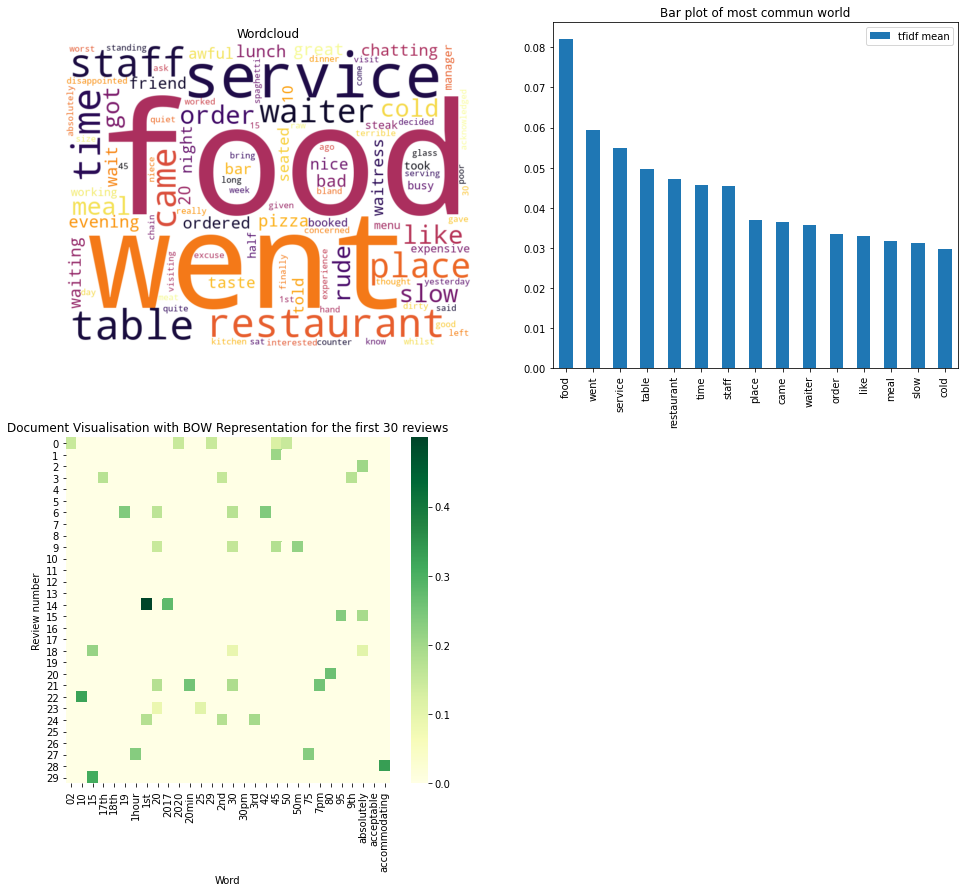

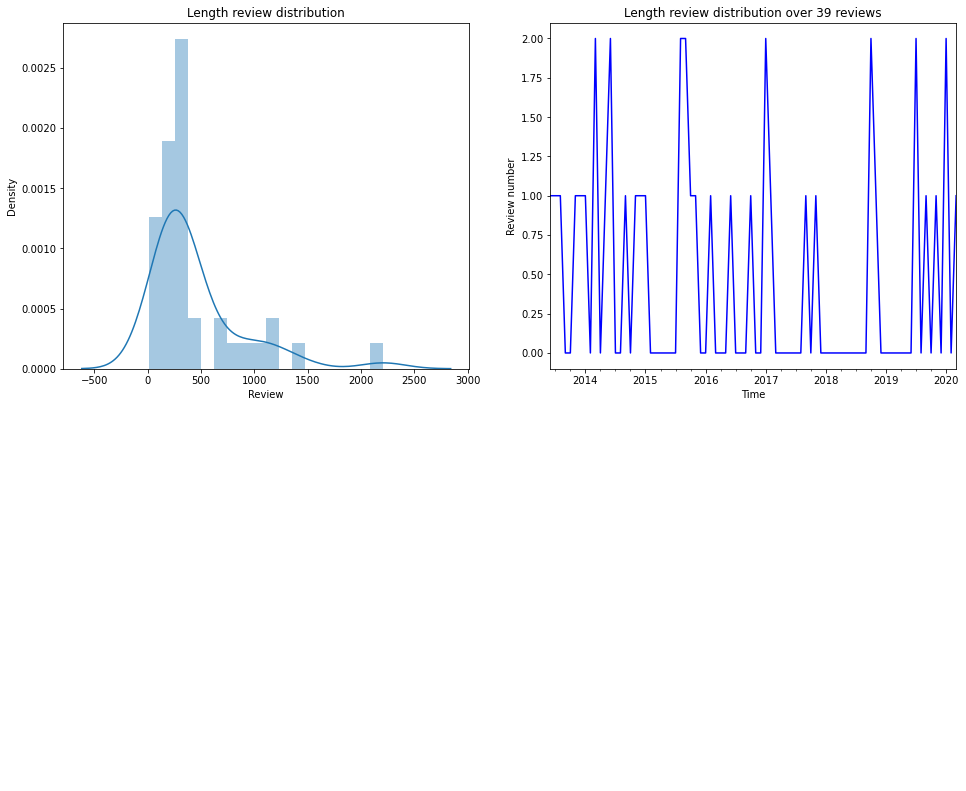

In [34]:
# Let's now only focus on the worst comment for this restaurant 
all_func.restaurants_review_analysis(df, stars=1, Restaurant_name = restaurant_name, number = False)
all_func.restaurants_grade_analysis(df, Restaurant_name = restaurant_name, stars=1);